In [ ]:
import cv2
import numpy as np
import glob
import random
import matplotlib.pyplot as plt

In [ ]:
base_path = '/content/drive/MyDrive/TACAI/Images/'
im_path_arr = []
for i in range(4):
  im_path_arr.append(glob.glob(base_path + str(i) + '/*.jpg'))
for i in range(0,len(im_path_arr)):
  print(im_path_arr[i])
print(np.shape(im_path_arr))

['/content/drive/MyDrive/TACAI/Images/0/9.jpg', '/content/drive/MyDrive/TACAI/Images/0/6.jpg', '/content/drive/MyDrive/TACAI/Images/0/0.jpg', '/content/drive/MyDrive/TACAI/Images/0/7.jpg', '/content/drive/MyDrive/TACAI/Images/0/3.jpg', '/content/drive/MyDrive/TACAI/Images/0/8.jpg', '/content/drive/MyDrive/TACAI/Images/0/2.jpg', '/content/drive/MyDrive/TACAI/Images/0/4.jpg', '/content/drive/MyDrive/TACAI/Images/0/5.jpg', '/content/drive/MyDrive/TACAI/Images/0/1.jpg']
['/content/drive/MyDrive/TACAI/Images/1/3.jpg', '/content/drive/MyDrive/TACAI/Images/1/2.jpg', '/content/drive/MyDrive/TACAI/Images/1/9.jpg', '/content/drive/MyDrive/TACAI/Images/1/6.jpg', '/content/drive/MyDrive/TACAI/Images/1/1.jpg', '/content/drive/MyDrive/TACAI/Images/1/4.jpg', '/content/drive/MyDrive/TACAI/Images/1/7.jpg', '/content/drive/MyDrive/TACAI/Images/1/8.jpg', '/content/drive/MyDrive/TACAI/Images/1/5.jpg', '/content/drive/MyDrive/TACAI/Images/1/0.jpg']
['/content/drive/MyDrive/TACAI/Images/2/1.jpg', '/content/

In [ ]:
random.seed(42)

train_img_indices = random.sample(range(0,9),7)

print(train_img_indices)

[1, 0, 5, 2, 8, 4, 7]


In [ ]:
train_img_paths = []
test_img_paths = []

for cls in im_path_arr:
  tmp_trn = []
  tmp_tst = []
  for path in cls:
    if int(path[-5]) in train_img_indices:
      tmp_trn.append(path)
    else:
      tmp_tst.append(path)
  train_img_paths.append(tmp_trn)
  test_img_paths.append(tmp_tst)


In [ ]:
def get_images(paths):
  imgs = []
  for cls in paths:
    t = []
    for im in cls:
      t.append(cv2.imread(im))
    imgs.append(t)
  return imgs

In [ ]:
train_images = get_images(train_img_paths)
test_images = get_images(test_img_paths)

print(np.shape(train_images))

(4, 7, 4032, 1908, 3)


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f081dc8c970>)

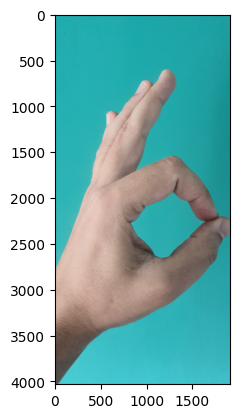

In [ ]:
im = train_images[2][3]
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(), plt.imshow(im_rgb )

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f081bbb30d0>)

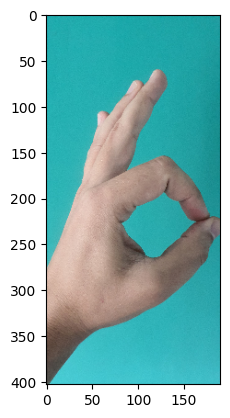

In [ ]:
w,h,c = np.shape(im_rgb)
nw = int(w/10)
nh = int(h/10)
im_rz = cv2.resize(im_rgb, (nh,nw))
plt.figure(), plt.imshow(im_rz)

In [ ]:
def transform_images(image_arr):
  out = []
  for cls in image_arr:
    t = []
    for im in cls:
      img_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
      w,h,c = np.shape(img_rgb)
      nw = int(w/10)
      nh = int(h/10)
      im_rez = cv2.resize(img_rgb, (nh,nw))
      t.append(im_rez)
    out.append(t)
  return out

In [ ]:
train_im = transform_images(train_images)
test_im = transform_images(test_images)

print(np.shape(train_im))
print(np.shape(test_im))

(4, 7, 403, 190, 3)
(4, 3, 403, 190, 3)


In [ ]:
def binarizare(img_arr):
  def functional_block(img):
    R=img[:,:,0]
    G=img[:,:,1]
    B=img[:,:,2]

    C1 = np.zeros((img.shape[0],img.shape[1]))
    C2 = np.zeros((img.shape[0],img.shape[1]))
    C3 = np.zeros((img.shape[0],img.shape[1]))
    C4 = np.zeros((img.shape[0],img.shape[1]))
    C5 = np.zeros((img.shape[0],img.shape[1]))
    C6 = np.zeros((img.shape[0],img.shape[1]))
    C7 = np.zeros((img.shape[0],img.shape[1]))
    rez = np.zeros((img.shape[0],img.shape[1]))

    C1[np.logical_and(R>95, G>40, B>20)] = 1
    C2[np.maximum(np.maximum(R,G),B)-np.minimum(np.minimum(R,G),B) > 15] = 1
    C3[np.absolute(R-G) > 15] = 1
    C4[np.logical_and(R > B, G > B)] = 1

    C5[np.logical_and(R>220,G>210,B>170)] = 1
    C6[np.absolute(R-G) <= 15] = 1
    C7[np.logical_and(R > B, G > B)] = 1

    caz1 = np.logical_and(np.logical_and(C1==1,C2==1,C3==1),C4==1)
    caz2 = np.logical_and(C5==1,C6==1,C7==1)

    rez[np.logical_or(caz1==1,caz2==1)] = 1
    return rez

  binarizare = []
  for cls in img_arr:
    t = []
    for img in cls:
      t.append(functional_block(img))
    binarizare.append(t)
  return binarizare


In [ ]:
train_im_bin = binarizare(train_im)
test_im_bin = binarizare(test_im)

print(np.shape(train_im_bin))
print(np.shape(test_im_bin))

(4, 7, 403, 190)
(4, 3, 403, 190)


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f081aa5acb0>)

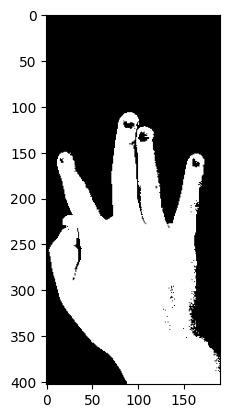

In [ ]:
plt.figure(), plt.imshow(train_im_bin[0][0],cmap='gray')

In [ ]:
def crop_im(img_arr_bin,img_arr_orig):
  def get_contours(img):
    cont, _ = cv2.findContours(img.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return cont
  def get_hand_cont(cnt):
    max_surf = 0
    max_cont = 0
    for c in cnt:
      tmp = cv2.boundingRect(c)
      surf = tmp[2]*tmp[3]
      if surf > max_surf:
        max_surf = surf
        max_cont = tmp
    return max_cont
  cropped=[]
  for i,cls in enumerate(img_arr_bin):
    t=[]
    for j, img in enumerate(cls):
      cs = get_contours(img)
      c = get_hand_cont(cs)
      cr_im = img[c[1]:c[1]+c[3],c[0]:c[0]+c[2]]
      cr_im_or = img_arr_orig[i][j][c[1]:c[1]+c[3],c[0]:c[0]+c[2]]
      cr_im_or[cr_im == 0] = 0
      cr_im_or = cv2.resize(cr_im_or, (64,128))
      t.append(cr_im_or)
    cropped.append(t)
  return cropped

In [ ]:
train_im_cr = crop_im(train_im_bin,train_im)
test_im_cr = crop_im(test_im_bin,test_im)

print(np.shape(train_im_cr))
print(np.shape(test_im_cr))

(4, 7, 128, 64, 3)
(4, 3, 128, 64, 3)


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f081aae9f60>)

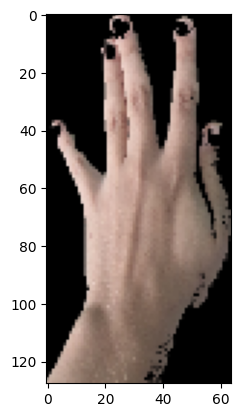

In [ ]:
plt.figure(), plt.imshow(train_im_cr[0][2],cmap='jet')

In [ ]:
image = test_im_cr[0][2]

#Parametrii HOG
winSize = (32,32)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)

winStride = (8,8)
padding = (8,8)
locations = ((10,20),)

hist = hog.compute(image,winStride,padding,locations)

(36,)


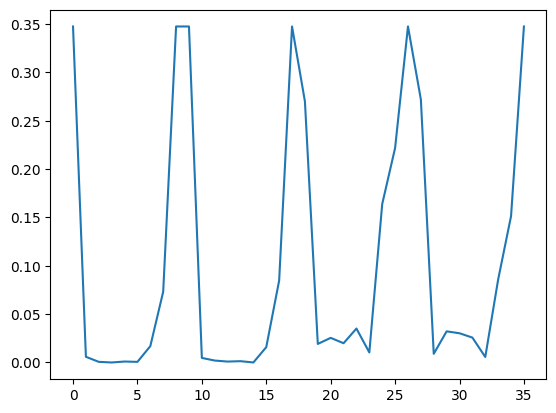

In [ ]:
print(np.shape(hist))
plt.plot(hist)

In [ ]:
def apply_HOG(img_arr, hog):
  out_hist = []
  out_labels = []
  i = -1
  for cls in img_arr:
    t = []
    i = i + 1
    for img in cls:
      tmp_hist = hog.compute(img,winStride,padding,locations)
      out_hist.append(tmp_hist)
      out_labels.append(i)
  return out_hist, out_labels

In [ ]:
train_db,train_labels = apply_HOG(train_im_cr,hog)
test_db,test_labels = apply_HOG(test_im_cr,hog)

In [ ]:
print(np.shape(train_db))
print(np.shape(test_db))

print(train_labels)
print(test_labels)

(28, 324)
(12, 324)
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3]
[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]


In [ ]:
train_db = np.float32(train_db)
test_db = np.float32(test_db)

train_labels_float = np.float32(train_labels)
test_labels_float = np.float32(test_labels)

In [ ]:
knn = cv2.ml.KNearest_create()
print(knn)

< cv2.ml.KNearest 0x7f081aa021d0>


In [ ]:
knn.train(train_db,cv2.ml.ROW_SAMPLE,train_labels_float)

True

In [ ]:
print(type(train_db[0][0]))
print(type(test_db[0][0]))

<class 'numpy.float32'>
<class 'numpy.float32'>


In [ ]:
a1,a2,a3,a4 = knn.findNearest(test_db[0].reshape(1,np.shape(test_db[0])[0]),3)

print(a2)

[[0.]]


In [ ]:
svm = cv2.ml.SVM_create()
print(svm)

< cv2.ml.SVM 0x7f08067133f0>


In [ ]:
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)

In [ ]:
svm.train(train_db,cv2.ml.ROW_SAMPLE,np.int32(train_labels))

True

In [ ]:
a1,a2 = svm.predict(test_db[0].reshape(1,np.shape(test_db[0])[0]))

print(a2)

[[3.]]


In [ ]:
#matr de confuzie